<a href="https://colab.research.google.com/github/johndoe775/data_analytics_project_files/blob/main/ubereda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta



In [202]:
df = pd.read_csv('/content/Uber Request Data.csv',parse_dates=[4,5], dayfirst = True,na_values = "NA")

In [28]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0000,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0000,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0000,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0000,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0000,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [29]:
df.describe()

,Request id,Driver id
count,6745.0000,4095.0000
mean,3384.6449,149.5013
std,1955.0997,86.0520
min,1.0000,1.0000
25%,1691.0000,75.0000
50%,3387.0000,149.0000
75%,5080.0000,224.0000
max,6766.0000,300.0000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [31]:
df.isna().sum()/len(df)*100

,0
Request id,0.0000
Pickup point,0.0000
Driver id,39.2884
Status,0.0000
Request timestamp,0.0000
Drop timestamp,58.0282


In [32]:
df[df["Status"]=="Cancelled"]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
2831,2905,City,1.0000,Cancelled,13-07-2016 06:08:41,NaN
2832,4805,City,1.0000,Cancelled,14-07-2016 17:07:58,NaN
2833,5202,Airport,1.0000,Cancelled,14-07-2016 20:51:37,NaN
2834,5927,City,1.0000,Cancelled,15-07-2016 10:12:40,NaN
2835,2347,Airport,2.0000,Cancelled,12/7/2016 19:14,NaN
...,...,...,...,...,...,...
4090,1641,City,299.0000,Cancelled,12/7/2016 7:20,NaN
4091,4158,City,299.0000,Cancelled,14-07-2016 05:03:10,NaN
4092,4164,City,299.0000,Cancelled,14-07-2016 05:06:40,NaN
4093,4448,City,299.0000,Cancelled,14-07-2016 08:30:59,NaN


In [33]:
df[df["Status"]=="No Cars Available"]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
4095,1362,City,NaN,No Cars Available,11/7/2016 0:02,NaN
4096,1364,City,NaN,No Cars Available,11/7/2016 0:06,NaN
4097,1366,City,NaN,No Cars Available,11/7/2016 0:09,NaN
4098,2,Airport,NaN,No Cars Available,11/7/2016 0:23,NaN
4099,7,Airport,NaN,No Cars Available,11/7/2016 0:30,NaN
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN



More than 50% of Drop time is null because of Cancelled Trips which makes sense.
Around 40% of Driver Id is null because of Cancelled Trips which makes sense.

In [34]:
df.dtypes

,0
Request id,int64
Pickup point,object
Driver id,float64
Status,object
Request timestamp,object
Drop timestamp,object


In [203]:
df["Request timestamp"]=pd.to_datetime(df["Request timestamp"],format="mixed")

In [204]:
df["Drop timestamp"]=pd.to_datetime(df["Drop timestamp"],format="mixed")

In [205]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0000,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0000,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0000,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0000,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0000,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT


In [206]:
# Categorizing the time stamp into multiple categories of day
def categorize_timeperiod(hour):
  if hour <= 4:
    return 'Dawn'
  elif hour <= 9 :
    return 'Early Morning'
  elif hour <= 16:
    return 'Afternoon'
  elif hour <= 21:
    return 'Late Evening'
  else:
    return 'Night'

In [207]:
df['Time_period'] = df['Request timestamp'].dt.hour.apply(categorize_timeperiod)
df['Time_period'].value_counts()

,count
Time_period,
Late Evening,2342
Early Morning,2103
Afternoon,1224
Dawn,578
Night,498


In [47]:
df["Status"].value_counts()

,count
Status,
Trip Completed,2831
No Cars Available,2650
Cancelled,1264


In [208]:
# Checking at which hours of the day the cabs are unavailable
# we can get to know about this when we put a filter on Trip completed status
# if Trip completed -> then cab is available, else if no cars available or cancelled then it means 'no cab available'
# point of time
def categorize_availability(availability):
 if availability == 'Trip Completed':
  return 'Cab Available'
 else:
  return 'No Cabs Available'

In [209]:
df['Cab_Availability'] = df['Status'].apply(categorize_availability)
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Time_period,Cab_Availability
0,619,Airport,1.0000,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,Afternoon,Cab Available
1,867,Airport,1.0000,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,Late Evening,Cab Available
2,1807,City,1.0000,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,Early Morning,Cab Available
3,2532,Airport,1.0000,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,Late Evening,Cab Available
4,3112,City,1.0000,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Early Morning,Cab Available
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,Night,No Cabs Available
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,Night,No Cabs Available
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,Night,No Cabs Available
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,Night,No Cabs Available


<Axes: xlabel='Time_period', ylabel='count'>

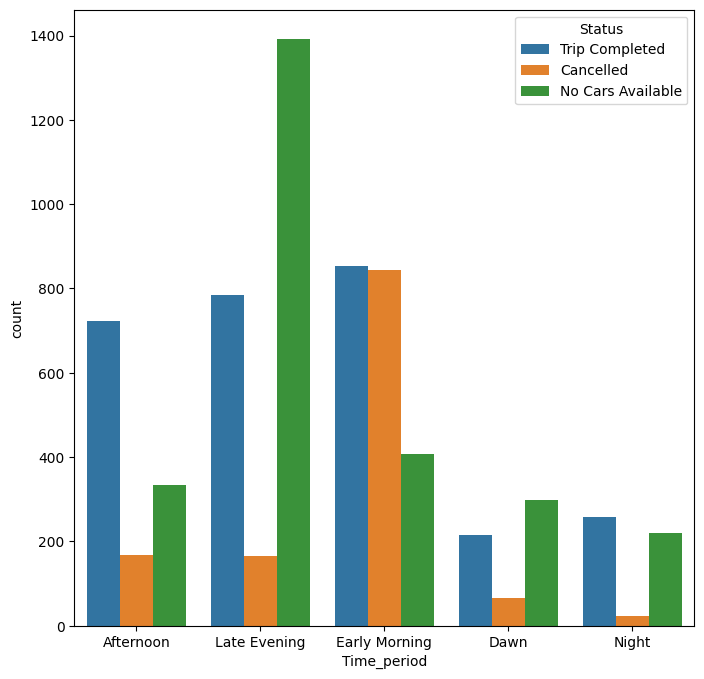

In [52]:
sns.countplot(data=df,x="Time_period",hue="Status")

In [100]:
df_time=(pd.crosstab(index=df["Time_period"],columns=df["Status"])/len(df)*100).reset_index()

In [102]:
df_time

Status,Time_period,Cancelled,No Cars Available,Trip Completed
0,Afternoon,2.4907,4.9518,10.7042
1,Dawn,0.9637,4.4329,3.1727
2,Early Morning,12.4981,6.0193,12.6612
3,Late Evening,2.4611,20.6375,11.6234
4,Night,0.3262,3.2468,3.8102


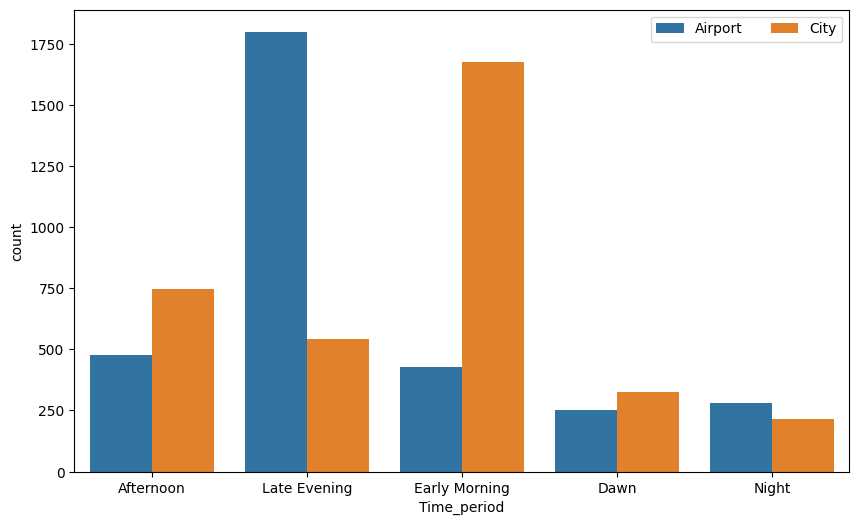

In [103]:
# IN late evening, we recieve more ride requests from users travelling from Airport to City, while it is vice versa
# in the Early Morning
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = 'Time_period', hue = 'Pickup point')
plt.legend(loc = 'upper right', frameon = True, ncol = 2)
plt.show()


In [106]:
df["Pickup point"].value_counts()

,count
Pickup point,
City,3507
Airport,3238


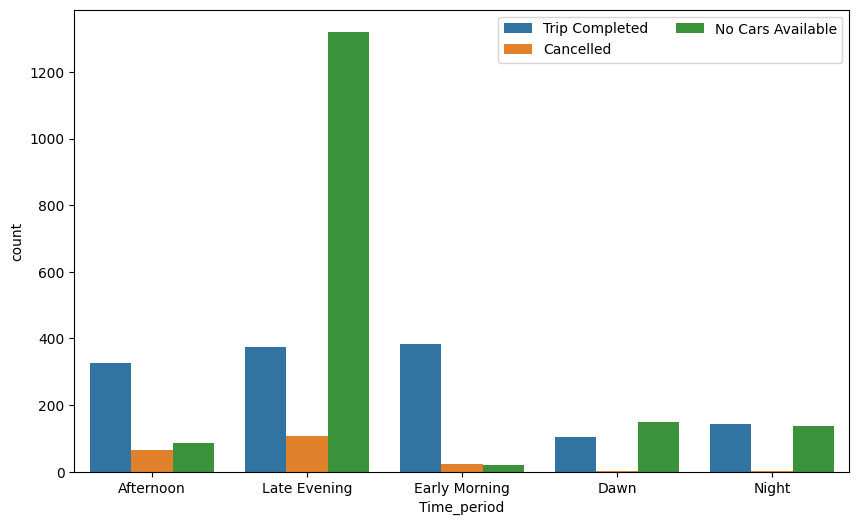

In [110]:
# IN late evening, we recieve more ride requests from users travelling from Airport to City, while it is vice versa
# in the Early Morning
plt.figure(figsize = (10,6))
sns.countplot(data = df[df['Pickup point']=="Airport"], x = 'Time_period', hue = 'Status')
plt.legend(loc = 'upper right', frameon = True, ncol = 2)
plt.show()


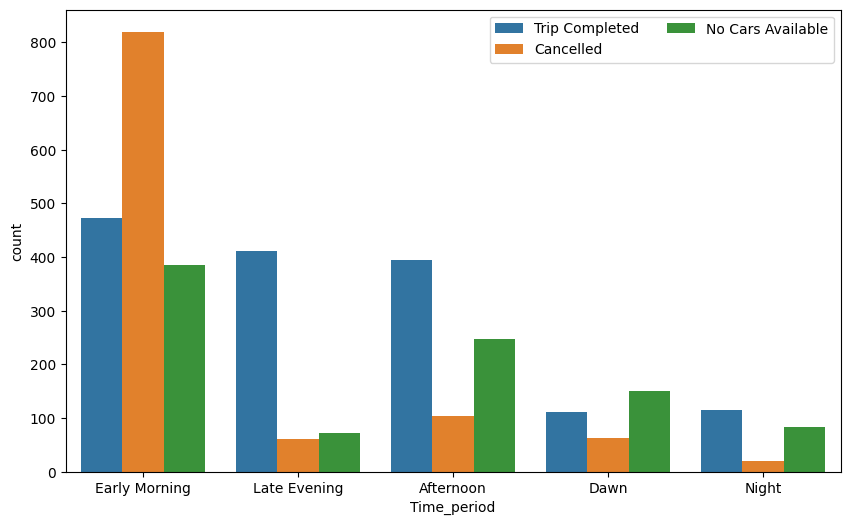

In [111]:
# IN late evening, we recieve more ride requests from users travelling from City to Airport, while it is vice versa
# in the Early Morning
plt.figure(figsize = (10,6))
sns.countplot(data = df[df['Pickup point']=="City"], x = 'Time_period', hue = 'Status')
plt.legend(loc = 'upper right', frameon = True, ncol = 2)
plt.show()

In [186]:
t0 =pd.crosstab(index=df[df["Pickup point"]=="Airport"]["Cab_Availability"],columns=df["Time_period"]).reset_index()[1:]
t0

Time_period,Cab_Availability,Afternoon,Dawn,Early Morning,Late Evening,Night
1,No Cabs Available,151,150,44,1427,139


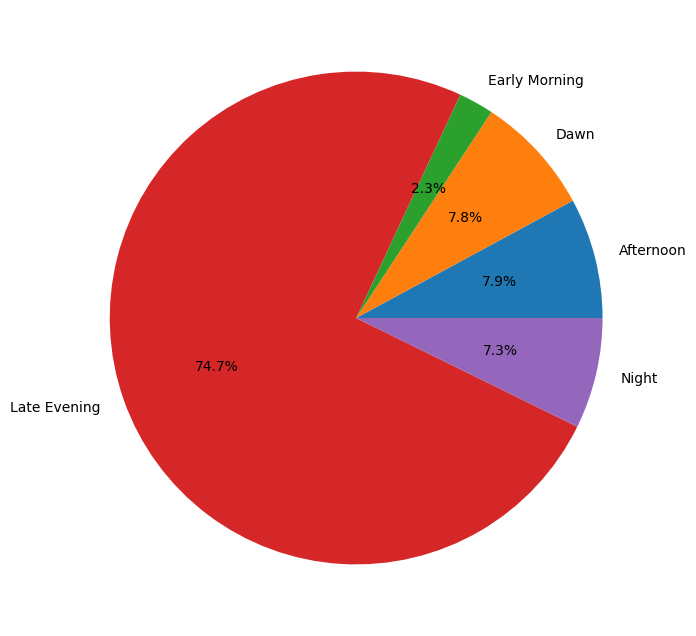

In [219]:
  # Percentage of Airport pickups where cabs are not available
  sizes=t0.iloc[:,1:].values
  labels=t0.columns[1:].values
  plt.pie(np.squeeze(sizes),labels=labels,autopct='%1.1f%%')
  plt.show()

In [181]:
t1=pd.crosstab(index=df[df["Pickup point"]=="City"]["Cab_Availability"],columns=df["Time_period"]).reset_index()[1:]
t1

Time_period,Cab_Availability,Afternoon,Dawn,Early Morning,Late Evening,Night
1,No Cabs Available,351,214,1205,131,102


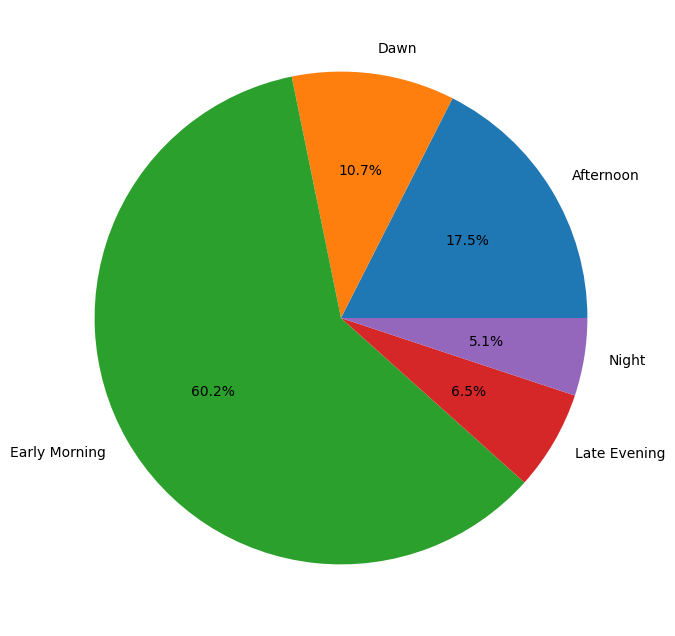

In [199]:
  # Percentage of City pickups where cabs are not available
  sizes=t1.iloc[:,1:].values
  labels=t1.columns[1:].values
  plt.pie(np.squeeze(sizes),labels=labels,autopct='%1.1f%%')
  plt.show()

In [211]:
t2=pd.crosstab(index=df[(df["Pickup point"]=="City") & (df["Status"]=="Cancelled")]["Cab_Availability"],columns=df["Time_period"]).reset_index()
t2

Time_period,Cab_Availability,Afternoon,Dawn,Early Morning,Late Evening,Night
0,No Cabs Available,104,63,820,60,19


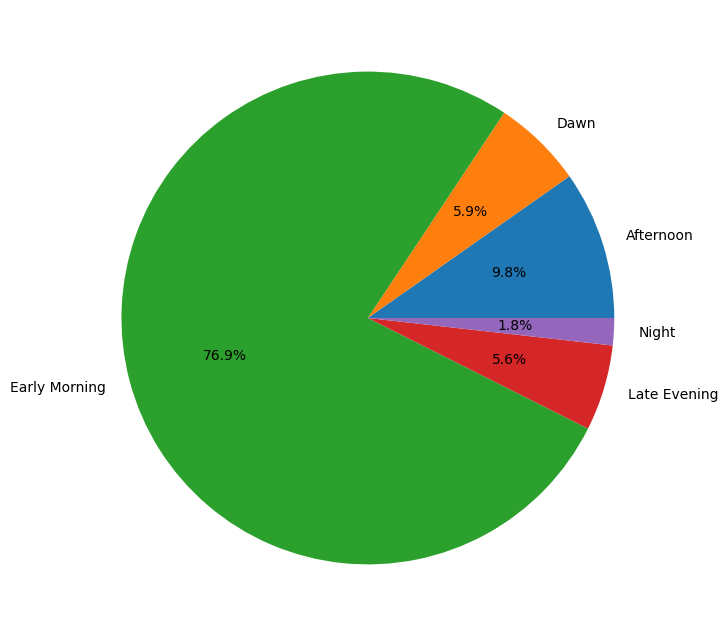

In [212]:
  # Percentage of City pickups where drivers cancelled the rides
  sizes=t2.iloc[:,1:].values
  labels=t2.columns[1:].values
  plt.pie(np.squeeze(sizes),labels=labels,autopct='%1.1f%%')
  plt.show()

In [140]:
#Percentage of requests across various times when the pick up is from City to Airport
pd.crosstab(index=df[(df["Pickup point"]=="City") ]["Status"],columns=df["Time_period"])/len(df)*100

Time_period,Afternoon,Dawn,Early Morning,Late Evening,Night
Status,,,,,
Cancelled,1.5419,0.9340,12.1572,0.8895,0.2817
No Cars Available,3.6620,2.2387,5.7079,1.0526,1.2305
Trip Completed,5.8562,1.6457,6.9978,6.0934,1.7050


In [141]:
#Percentage of requests across various times when the pick up is from Airport to City
pd.crosstab(index=df[(df["Pickup point"]=="Airport") ]["Status"],columns=df["Time_period"])/len(df)*100

Time_period,Afternoon,Dawn,Early Morning,Late Evening,Night
Status,,,,,
Cancelled,0.9489,0.0297,0.3410,1.5715,0.0445
No Cars Available,1.2898,2.1942,0.3113,19.5849,2.0163
Trip Completed,4.8480,1.5271,5.6635,5.5300,2.1053


In [215]:
t3=pd.crosstab(index=df[(df["Pickup point"]=="Airport") & (df["Status"]=="Cancelled")]["Cab_Availability"],columns=df["Time_period"]).reset_index()
t3

Time_period,Cab_Availability,Afternoon,Dawn,Early Morning,Late Evening,Night
0,No Cabs Available,64,2,23,106,3


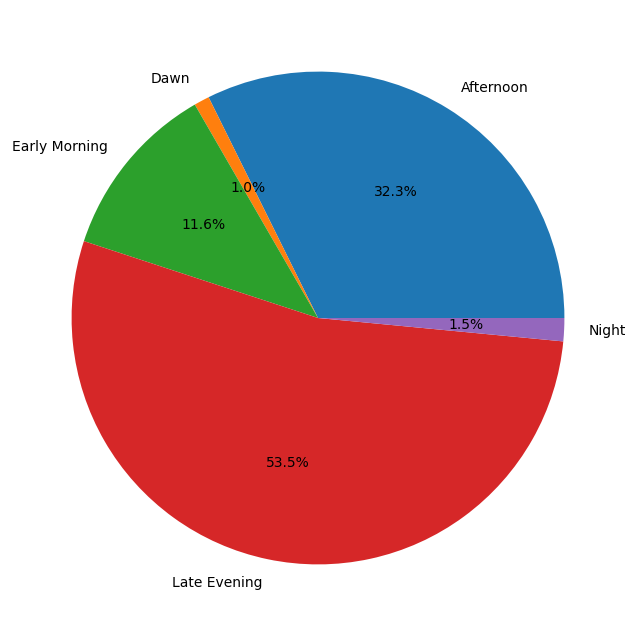

In [216]:
  # Percentage of Airport pickups where drivers cancelled the ride
  sizes=t3.iloc[:,1:].values
  labels=t3.columns[1:].values
  plt.pie(np.squeeze(sizes),labels=labels,autopct='%1.1f%%')
  plt.show()

In [217]:
t4=pd.crosstab(index=df[(df["Pickup point"]=="Airport") ]["Cab_Availability"],columns=df["Time_period"]).reset_index()[1:]
t4

Time_period,Cab_Availability,Afternoon,Dawn,Early Morning,Late Evening,Night
1,No Cabs Available,151,150,44,1427,139


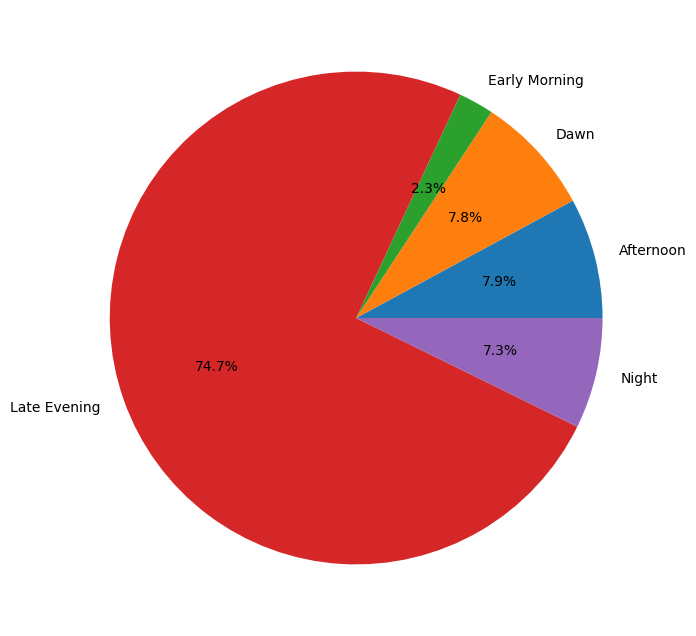

In [218]:
   # Percentage of Airport pickups where cabs are not available
  sizes=t4.iloc[:,1:].values
  labels=t4.columns[1:].values
  plt.pie(np.squeeze(sizes),labels=labels,autopct='%1.1f%%')
  plt.show()

In [150]:
pd.crosstab(index=df["Time_period"],columns=df["Cab_Availability"]).reset_index()

Cab_Availability,Time_period,Cab Available,No Cabs Available
0,Afternoon,722,502
1,Dawn,214,364
2,Early Morning,854,1249
3,Late Evening,784,1558
4,Night,257,241


In [131]:
pd.crosstab(index=df["Cab_Availability"],columns=df["Time_period"]).reset_index()

Time_period,Cab_Availability,Afternoon,Dawn,Early Morning,Late Evening,Night
0,Cab Available,722,214,854,784,257
1,No Cabs Available,502,364,1249,1558,241


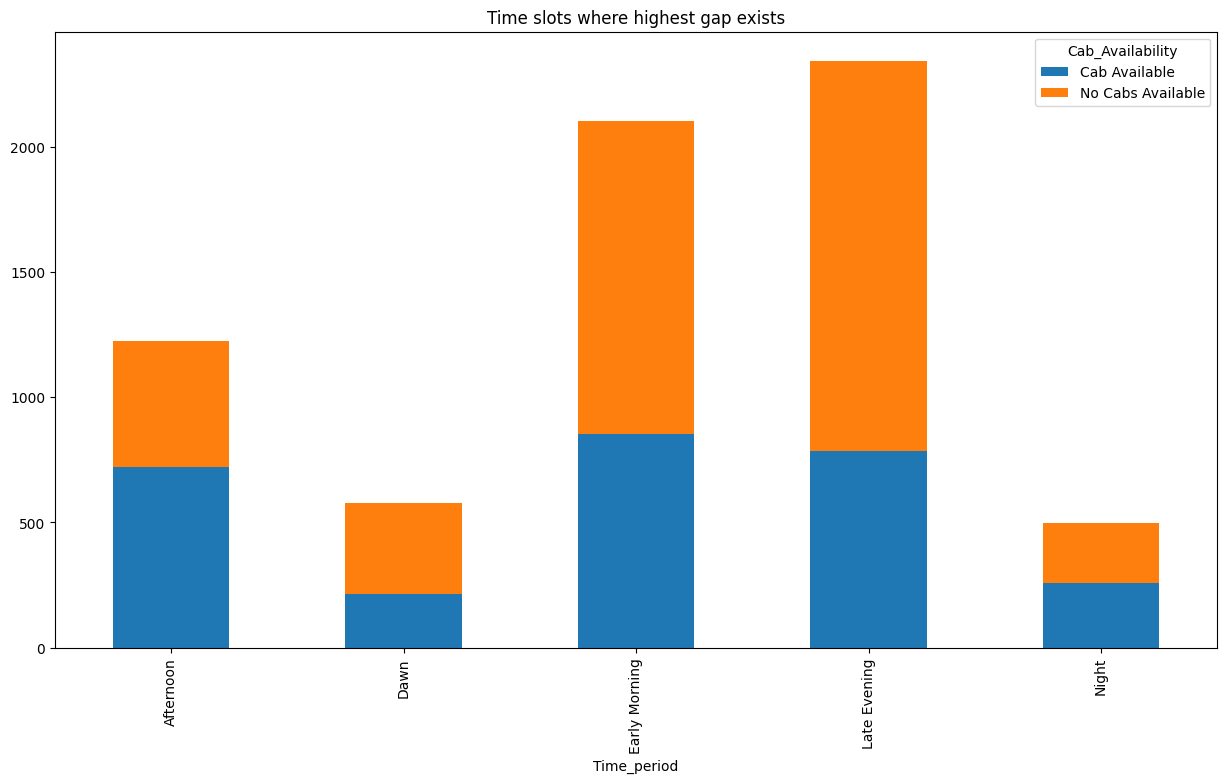

In [221]:
# Highest gap between the rides
# Time slots where highest gap exists -
df.groupby(['Time_period','Cab_Availability']).size().unstack().plot(kind='bar', stacked=True,figsize=(15, 8))
plt.title('Time slots where highest gap exists')
plt.show()

In [223]:
from scipy.stats import chi2_contingency

In [224]:
# Checking for a relation between Time period and Cab Availability ?
# Are they linearly dependent on each other ?
# Assuming 'Cab Availability' is the column containing Cab availability in the Uber DataFrame.
# 'Time period' is the column containing information on desired requests time in a day.
# Since we have two object based columns i.e strings, we can use Chi-square test.
# For example:
# Create a contingency table
contingency_table = pd.crosstab(df['Time_period'], df['Cab_Availability'])
# Perform the Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
# Define the significance level (alpha)
alpha = 0.05
# Check the p-value against the significance level to make a decision
if p_value < alpha:
 print("Reject the null hypothesis. Time is significantly related to Cab Availability.")
else:
 print("Fail to reject the null hypothesis. Time does not significantly improve Cab Availability")

Reject the null hypothesis. Time is significantly related to Cab Availability.


In [232]:
# calculating demand and supply at overall level

In [226]:
t6=pd.crosstab(index=df["Cab_Availability"],columns=df["Time_period"]).reset_index()

In [231]:
ods=t6.iloc[:,1:].values

In [233]:
ods[1]

array([ 502,  364, 1249, 1558,  241])

In [234]:
ods[0]

array([722, 214, 854, 784, 257])

In [240]:
t6.columns[1:]

Index(['Afternoon', 'Dawn', 'Early Morning', 'Late Evening', 'Night'], dtype='object', name='Time_period')

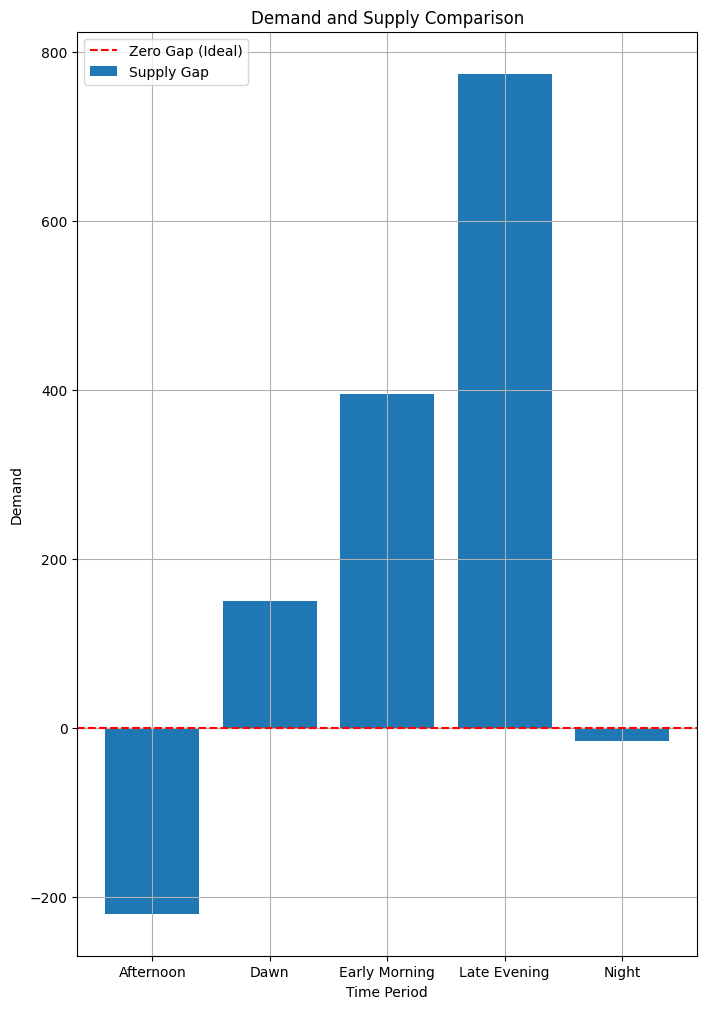

In [269]:
# Overall Demand and Supply
plt.figure(figsize=(8, 12))
#plt.bar( x=t6.columns[1:],height=ods[1],label="Demand")
plt.bar( x=t6.columns[1:],height=ods[1]-ods[0],label="Supply Gap")
plt.axhline(0, color='red', linestyle='--', label='Zero Gap (Ideal)')
plt.grid(True)
plt.xlabel('Time Period')
plt.ylabel('Demand')
plt.title('Demand and Supply Comparison')
plt.legend()
plt.show()



In [251]:
t6

Time_period,Cab_Availability,Afternoon,Dawn,Early Morning,Late Evening,Night
0,Cab Available,722,214,854,784,257
1,No Cabs Available,502,364,1249,1558,241


In [257]:
t7=pd.crosstab(index=df[df["Pickup point"]=="City"]["Cab_Availability"],columns=df["Time_period"]).reset_index()

In [258]:
t7

Time_period,Cab_Availability,Afternoon,Dawn,Early Morning,Late Evening,Night
0,Cab Available,395,111,472,411,115
1,No Cabs Available,351,214,1205,131,102


In [264]:
cds=t7.values[:,1:]

In [265]:
cds

array([[395, 111, 472, 411, 115],
       [351, 214, 1205, 131, 102]], dtype=object)

In [267]:
city_demand=cds[1]
city_demand

array([351, 214, 1205, 131, 102], dtype=object)

In [268]:
city_supply=cds[0]
city_supply

array([395, 111, 472, 411, 115], dtype=object)

In [280]:
city_demand-city_supply

array([-44, 103, 733, -280, -13], dtype=object)

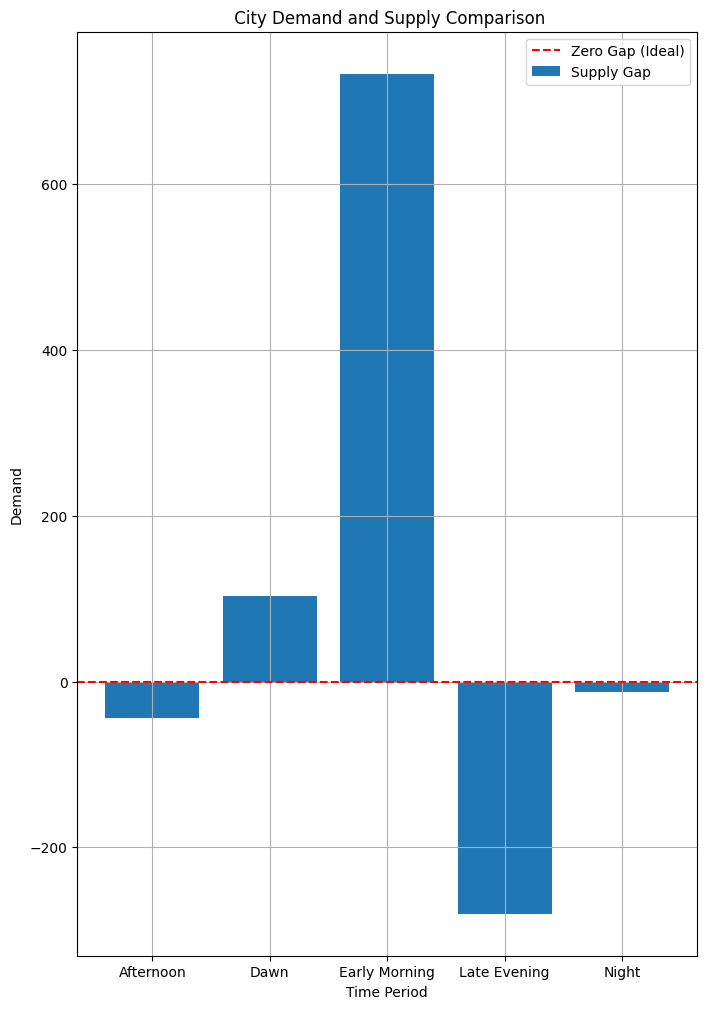

In [271]:
# City wise  Demand and Supply
plt.figure(figsize=(8, 12))
#plt.bar( x=t7.columns[1:],height=city_demand,label="Demand")
plt.bar( x=t7.columns[1:],height=city_demand-city_supply,label="Supply Gap")
plt.axhline(0, color='red', linestyle='--', label='Zero Gap (Ideal)')
plt.grid(True)
plt.xlabel('Time Period')
plt.ylabel('Demand')
plt.title(' City Demand and Supply Comparison')
plt.legend()
plt.show()

In [272]:
t8=pd.crosstab(index=df[df["Pickup point"]=="Airport"]["Cab_Availability"],columns=df["Time_period"]).reset_index()

In [273]:
t8

Time_period,Cab_Availability,Afternoon,Dawn,Early Morning,Late Evening,Night
0,Cab Available,327,103,382,373,142
1,No Cabs Available,151,150,44,1427,139


In [277]:
ads=t8.values[:,1:]

In [278]:
ads[1]-ads[0]

array([-176, 47, -338, 1054, -3], dtype=object)

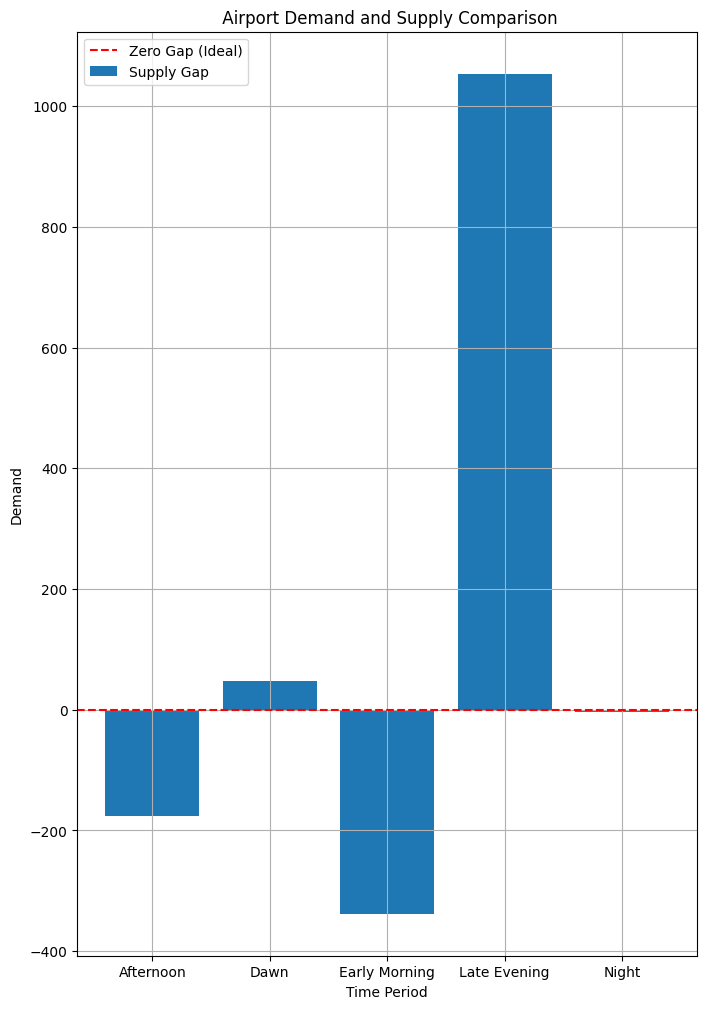

In [279]:
# Airport wise  Demand and Supply
plt.figure(figsize=(8, 12))
#plt.bar( x=t7.columns[1:],height=city_demand,label="Demand")
plt.bar( x=t8.columns[1:],height=ads[1]-ads[0],label="Supply Gap")
plt.axhline(0, color='red', linestyle='--', label='Zero Gap (Ideal)')
plt.grid(True)
plt.xlabel('Time Period')
plt.ylabel('Demand')
plt.title(' Airport Demand and Supply Comparison')
plt.legend()
plt.show()

Observations so far:

The problematic status are 'cancelled' and 'no cars available' as it leads to potential loss of revenue. We observed that
Status: "No car available"
Where is it happening: Airport - i.e airport to city
When is it happening: Evening
Status: "Cancelled"
Where is it happening: City - i.e city to airport
When is it happening: Morning
The above points are in sync with highest request rates coming from morning and evening slot.
To make our analayse our observation so far, we further looked into the 'gap'. This again is in sync with above observations
Status: "No car available"
Where is it happening: Airport - i.e airport to city
When is it happening: Evening
Status: "Cancelled"
Where is it happening: City - i.e city to airport
When is it happening: Morning.

And vice versa is not true:
 1. Morning hours :There is no high demand for cabs from airport to city
 2. Evening hours: There is no high demand for cabs from city to airport
This tells us that there are more outbound flights in the morning and inbound flights in the evening.
The reason for the issue:
In the morning hours: Though there is high demand for cabs from city to airport, the vice versa is not true.
 Hence the driver tends to 'cancel' the request as getting a return trip from airport
 to city would be tough.
In the evening hours: Though there is high demand for cabs from airport to city, the vice versa is not true.
 Hence 'no cars available' in the airport is the hightest in the evening.

Possible suggestions to fill the supply demand gap:
1) Provide incentives for airport trips during peak time.
2) Assigning few extra cabs specially to the airport trips.
3) Fixing a base price for drivers idle time in the airport or to come back to the city without any passenger.
4) Impose penalty for cancellation of requests by the drivers. Set a threshold for the maximum cancellation per day.
5) Promote continuous trip to airport with incentives.

